# Animate line drawing
We can use LineCollection, where we have a collection of many small line of only 2 points.
Then in turn, we can change the alpha of each line to create an effect of continuously drawing the line.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
%matplotlib inline

In [4]:
# Create some data for line
def f(x: float) -> float:
    return x+np.exp(2*np.cos(x)) - 4

x = np.linspace(-2, 4, 100)
xy = np.array([x, f(x)])

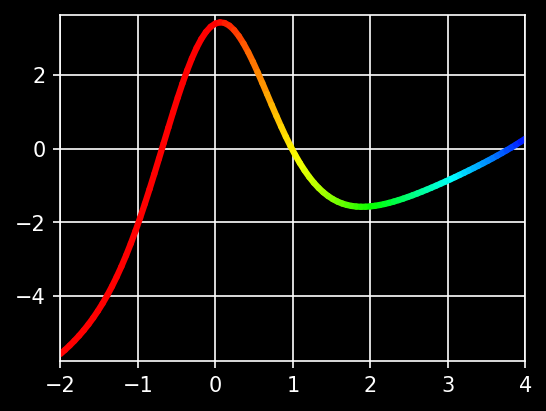

In [12]:
points = xy.T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = matplotlib.collections.LineCollection(segments, linewidth=3)
lc.set_colors(plt.cm.hsv(x/(x[-1]-x[0])))
lc.set_capstyle("round")

fig, ax = plt.subplots(1, 1, figsize=(4, 3), dpi=150)
fig.set_facecolor("black")
ax.set_facecolor("black")
ax.tick_params(colors="white", which="both")
ax.spines["bottom"].set_color("white")
ax.spines["top"].set_color("white") 
ax.spines["right"].set_color("white")
ax.spines["left"].set_color("white")
ax.grid(True, which="both", color="white")
ax.set_xlim(x[0], x[-1])
ax.set_ylim(min(f(x))-0.2, max(f(x))+0.2)
ax.add_collection(lc)

In [13]:
def animate_line(x_current):
    lc.set_alpha(x <= x_current)
    return [lc]

anim = FuncAnimation(
    fig,
    animate_line,
    frames=np.linspace(x[0], x[-1], 90),
    interval=30,
    # init_func=init,
    blit=True
)

display(HTML(anim.to_jshtml()))

In [14]:
xy.shape

(2, 100)

In [15]:
points.shape

(100, 1, 2)

In [16]:
segments.shape

(99, 2, 2)

In [24]:
xy[:, :3].T

array([[-2.        , -5.56494972],
       [-1.93939394, -5.45294103],
       [-1.87878788, -5.33341777]])

In [23]:
segments[0], segments[1], segments[2]

(array([[-2.        , -5.56494972],
        [-1.93939394, -5.45294103]]),
 array([[-1.93939394, -5.45294103],
        [-1.87878788, -5.33341777]]),
 array([[-1.87878788, -5.33341777],
        [-1.81818182, -5.20539598]]))